<a href="https://colab.research.google.com/github/tjrademaker/ants_project/blob/master/analysis-train-on-mixed-copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embedding of ant behaviour data

In [0]:
#made some changes
#now I will try to save this file in Github. How will that look like?

In [0]:
import pickle
import scipy
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as clr
import matplotlib.cm as cm

import seaborn as sns

from sklearn.cluster import DBSCAN

from helper import *

NameError: name 'false' is not defined

# Import data

In [0]:
df = pd.read_csv('../data/all_individuals_daysbytask.csv')

In [0]:
df.head()

,colony,individual,setup type,behaviour,2,3,4,5,6,7,...,12,13,14,15,16,17,18,19,20,21
0,7,RRR,1,allogroom,0,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
1,7,RRR,1,troph,0,0,0,0,0,0,...,1,0,1,0,1,1,0,0,0,0
2,7,RRR,1,G egg,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,RRR,1,C egg,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,RRR,1,A eclosion,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [0]:
df = pd.read_csv('../data/all_individuals_daysbytask.csv')
df = df.pivot_table(index=['colony','individual','setup type'],columns='behaviour')
df = df.swaplevel(0,1,axis=1)
df = df.stack()
df.index.names = ['Colony','Individual','Setup type','Day']
df.index = df.index.set_levels(df.index.levels[-1].astype(int), level=-1)
df.sort_index(level=-2,inplace=True)
df = df.sample(len(df),random_state=99)

In [0]:
df.head(5)

,,,behaviour,A eclosion,C egg,C larva,C pupa,Exit,F larva,Forage,G egg,G larva,G pupa,Handle dead,allogroom,troph
Colony,Individual,Setup type,Day,,,,,,,,,,,,,
42,GG,2,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,RRR,1,16,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
40,GXY,2,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GG,1,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,RRY,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Print all known conditions of experiments

In [0]:
colonies = np.unique(df.index.get_level_values('Colony'))
individuals = np.unique(df.index.get_level_values('Individual'))
setup_types = np.unique(df.index.get_level_values('Setup type'))

print('Colonies: %s\n'%colonies)
print('Individuals: %s\n'%individuals)
print('Setup type: %s\n'%setup_types)

Colonies: [ 4  7 17 34 40 41 42 43]

Individuals: ['BB' 'BYB' 'GG' 'GGG' 'GGO' 'GGR' 'GGY' 'GO' 'GOG' 'GOO' 'GR' 'GXY' 'GY'
 'GYG' 'GYR' 'GYY' 'OG' 'OGO' 'OO' 'OOG' 'OOO' 'OOY' 'OR' 'ORO' 'ORR'
 'OXG' 'OY' 'OYO' 'OYR' 'OYY' 'RG' 'RGR' 'RGY' 'RO' 'RR' 'RRG' 'RRR' 'RRY'
 'RXG' 'RXX' 'RY' 'RYG' 'RYR' 'RYY' 'XBY' 'XRG' 'XRR' 'XRX' 'XXR' 'XXY'
 'YG' 'YGG' 'YGY' 'YO' 'YOG' 'YR' 'YRR' 'YXO' 'YXX' 'YY' 'YYG' 'YYY']

Setup type: [1 2]



# Determine clusters

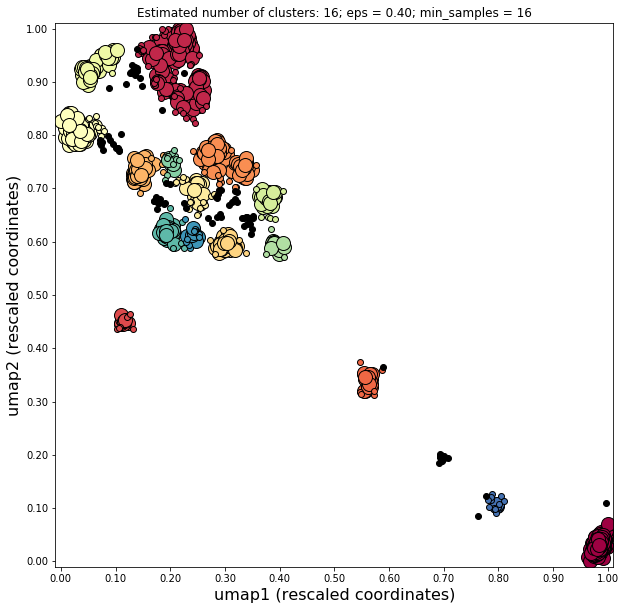

In [0]:
umap="umap-0.30-25.pkl"
labels = determine_clusters(
    x_f=[0,1],
    y_f=[0,1],
    epsilon=0.4,
    min_samples=16,
    filename=umap
);

In [0]:
labels

array([0, 1, 0, ..., 0, 1, 0])

In [0]:
# Add another multilevel index for clusters
df = pickle.load(open('../output/%s'%umap,'rb'))
lims = [(0.5*(df[0].min()+df[0].max()),df[0].max()), (df[1].min(),df[1].max())]
if 'Cluster' in df.index.names: df.index = df.index.droplevel(['Cluster'])
df['Cluster'] = labels
df.set_index('Cluster', append=True, inplace=True)
with open('../data/umap-cluster-shuffle.pkl','wb') as f:
    pickle.dump(df,f)

In [0]:
df.head()

,,,,,0,1,A eclosion,C egg,C larva,C pupa,Exit,F larva,Forage,G egg,G larva,G pupa,Handle dead,allogroom,troph
Colony,Individual,Setup type,Day,Cluster,,,,,,,,,,,,,,,
42,GG,2,13,0,11.472810,-1.885068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,RRR,1,16,1,-2.520313,10.993263,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
40,GXY,2,17,0,11.565340,-1.950166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GG,1,17,0,11.546590,-1.873428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,RRY,1,2,0,11.518154,-1.972331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Visualize embedding and save figures

(4, 7, 17, 34, 40, 41, 42, 43)
Cluster = -1
Fraction of total points = 0.032


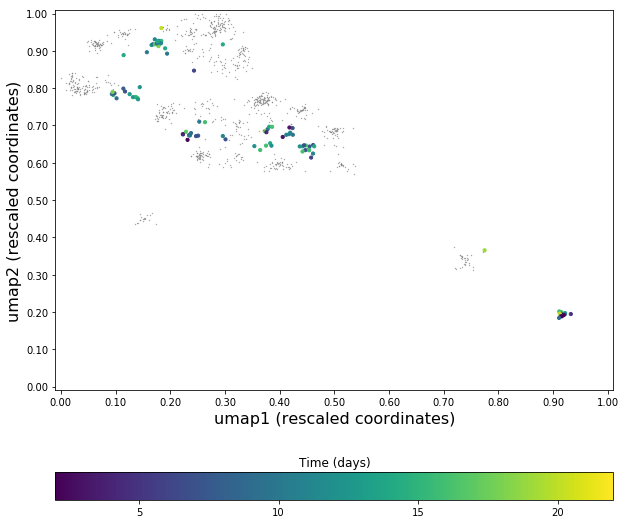

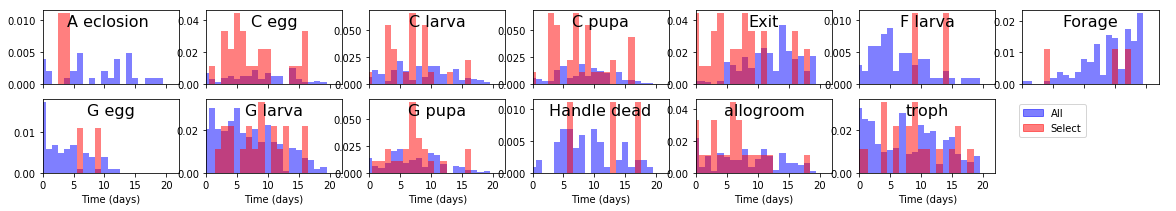

In [0]:
%matplotlib inline
x_f = [0,1]
y_f = [0,1]
colony = 'all' # Or specify one or multiple colonies as (4,7,17) (a tuple). 
print(tuple(colonies)) #to display colony names
individual = 0 # =all. Or specify by choosing an individual
setup_type = 0 # =all. Or specify by choosing a setup_type
cluster = 1 # =all. Or specify by choosing a cluster

save_figure(labels,x_f,y_f,colony,individual,setup_type,cluster)

# Histograms per cluster and setup type

Cluster = -1
0.025


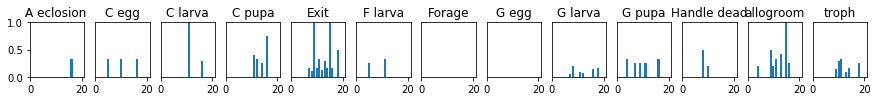

Cluster = 0
0.640


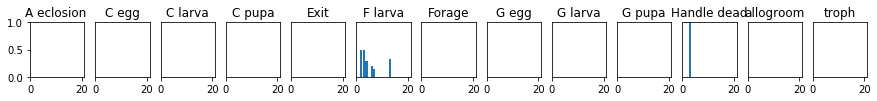

Cluster = 1
0.090


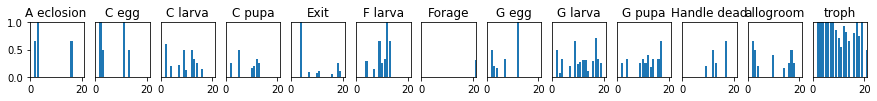

Cluster = 2
0.000


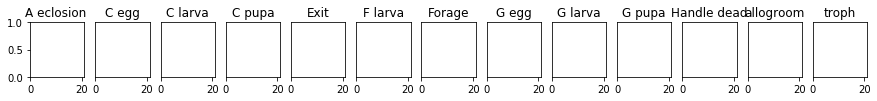

Cluster = 3
0.007


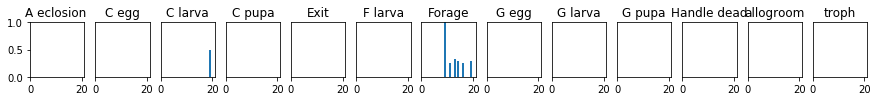

Cluster = 4
0.071


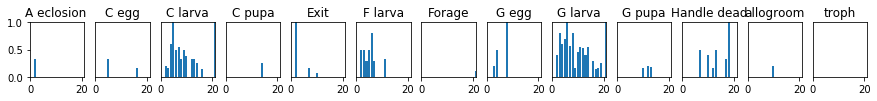

Cluster = 5
0.017


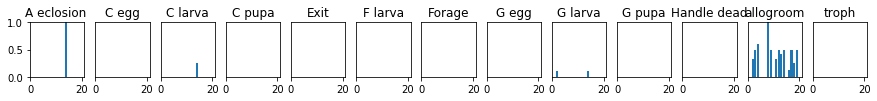

Cluster = 6
0.011


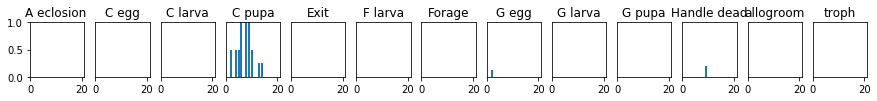

Cluster = 7
0.017


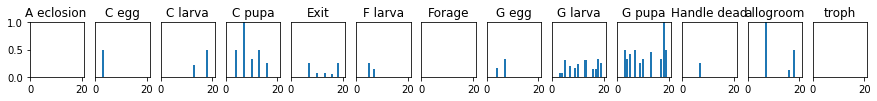

Cluster = 8
0.044


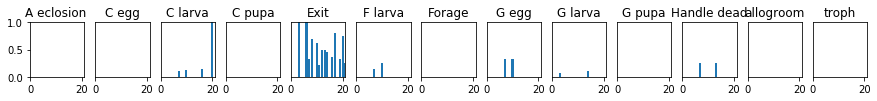

Cluster = 9
0.025


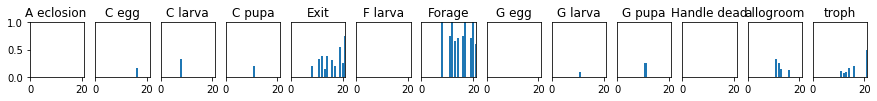

Cluster = 10
0.016


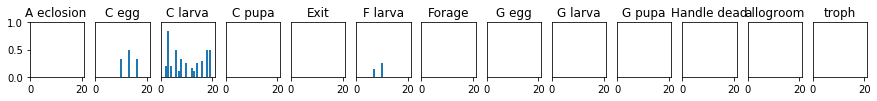

Cluster = 11
0.010


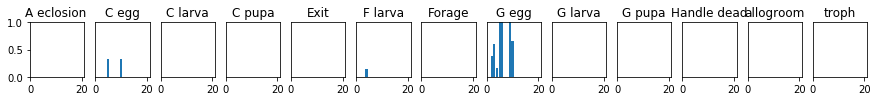

Cluster = 12
0.004


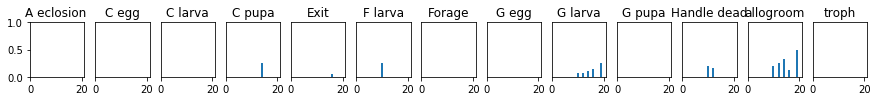

Cluster = 13
0.014


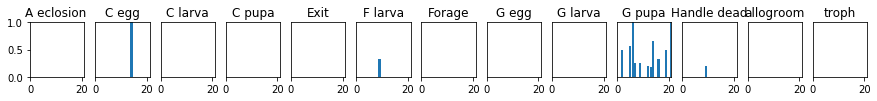

Cluster = 14
0.004


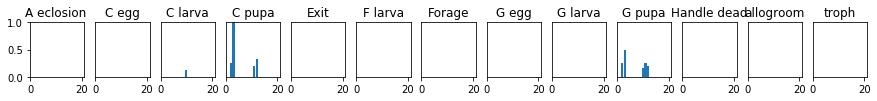

Cluster = 15
0.004


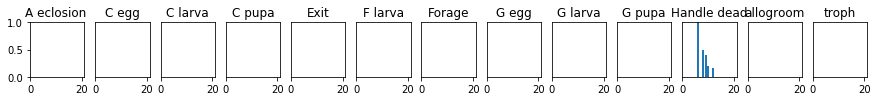

In [0]:
%matplotlib inline

df = pickle.load(open('../data/umap-cluster-shuffle.pkl','rb'))

# Set parameters to select specific colonies, individuals or setup types
colony = 'all' # Or specify one or multiple colonies as (4,7,17) (a tuple). 
# print(tuple(colonies)) #to display colony names
individual = 0 # =all. Or specify by choosing an individual
setup_type = 1 # =all. Or specify by choosing a setup_type

colonies = df.index.get_level_values('Colony').unique()
individuals = df.index.get_level_values('Individual').unique()
clusters = np.sort(df.index.get_level_values('Cluster').unique())

for cluster in clusters:

    print("Cluster = %s"%cluster)
    
    # Apply setup_type filter and cluster filter
    df_s = df[build_condition_filter(df,[('Setup type',setup_type)])]
    df_pc = df_s[build_condition_filter(df_s,[('Cluster',cluster)])]

    df_pcf = df_pc.groupby(level=3).sum().iloc[:,2:]/df_s.groupby(level=3).sum().iloc[:,2:]
    df_pcf = df_pcf.fillna(0)
    
    print('%.3f'%(len(df_pc)/len(df_s)))
    
    fig,axes=plt.subplots(1,13, figsize=(15,1))
    for ax,col in zip(axes.flatten(),df_pcf):
        ax.bar(df_pcf.index,df_pcf[col])
        ax.set_xlim([0,21])
        if str(col) != "A eclosion ":
            ax.set_yticks([])
        ax.set_ylim([0,1])
        ax.set_title(col)
#     axes[1,6].axis('off')
#     plt.tight_layout()
    
     ### COMMENT OUT IF NOT SAVING figures, OTHERWISE, ADD FOLDER cluster-hists TO YOUR DIRECTORY
#     plt.savefig('../figures/cluster-hists/setup_type=%d/%d.pdf'%(setup_type,cluster))
    plt.show()

Setup type = 1
Cluster = -1
0.025
A eclosion 
C egg
C larva
C pupa
Exit
F larva
Forage
G egg
G larva
G pupa
Handle dead
allogroom
troph


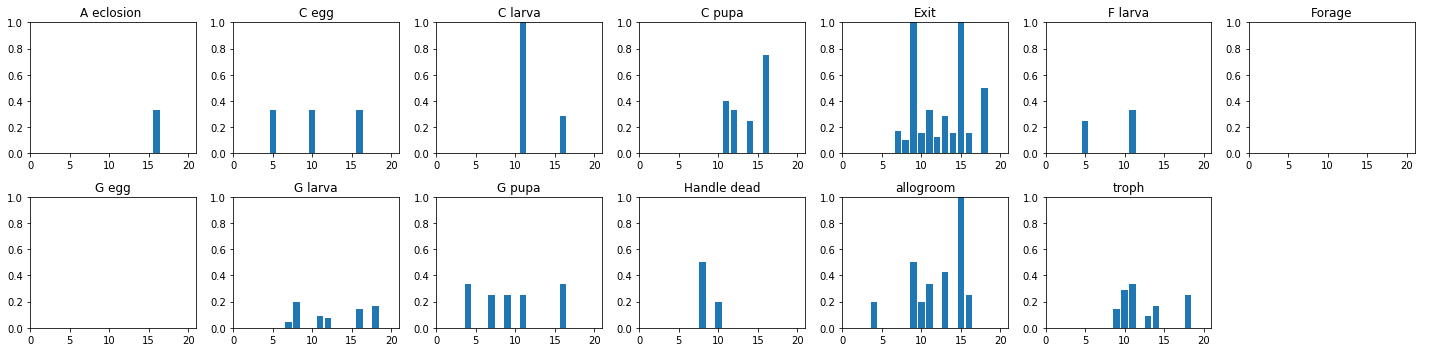

Setup type = 1
Cluster = 0
0.640
A eclosion 
C egg
C larva
C pupa
Exit
F larva
Forage
G egg
G larva
G pupa
Handle dead
allogroom
troph


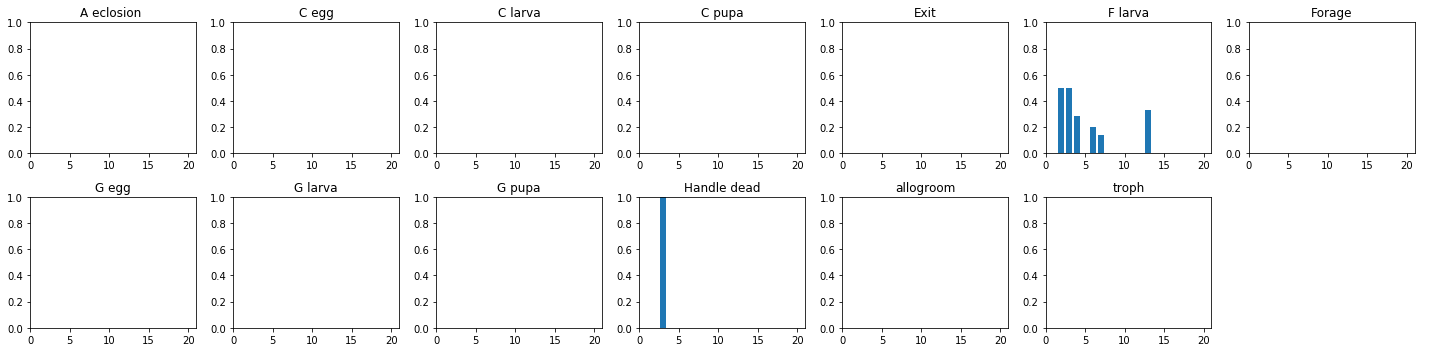

Setup type = 1
Cluster = 1
0.090
A eclosion 
C egg
C larva
C pupa
Exit
F larva
Forage
G egg
G larva
G pupa
Handle dead
allogroom
troph


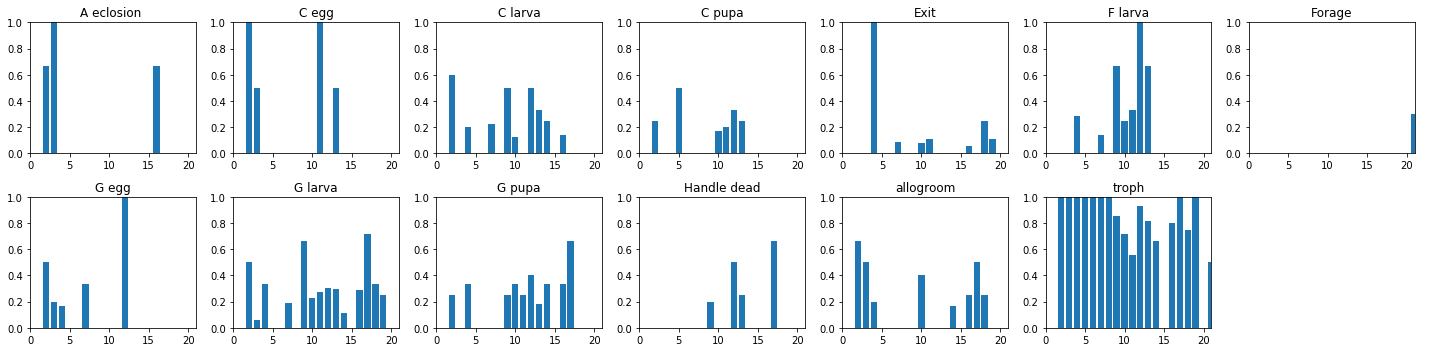

Setup type = 1
Cluster = 2
0.000
A eclosion 
C egg
C larva
C pupa
Exit
F larva
Forage
G egg
G larva
G pupa
Handle dead
allogroom
troph


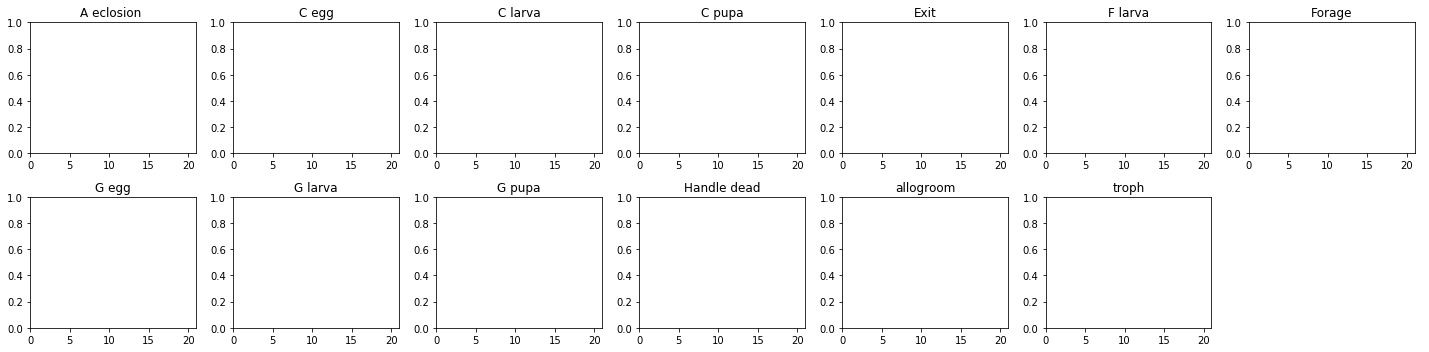

Setup type = 1
Cluster = 3
0.007
A eclosion 
C egg
C larva
C pupa
Exit
F larva
Forage
G egg
G larva
G pupa
Handle dead
allogroom
troph


KeyboardInterrupt: 

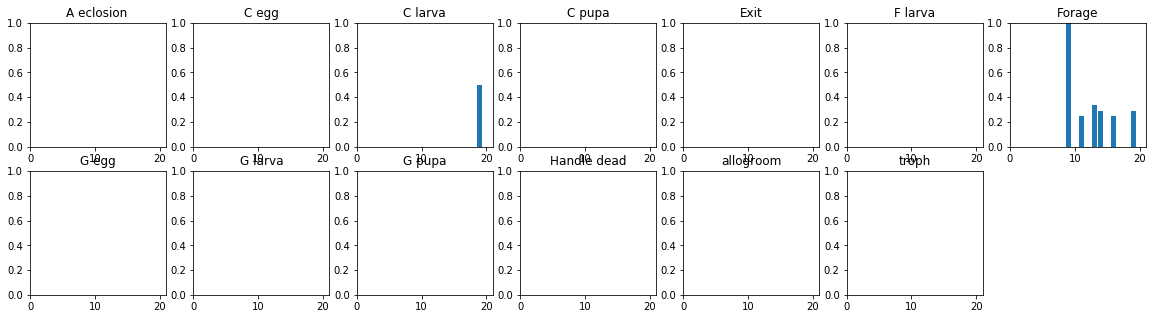

In [0]:
%matplotlib inline

df = pickle.load(open('../data/umap-cluster-shuffle.pkl','rb'))

# Set parameters to select specific colonies, individuals or setup types
colony = 'all' # Or specify one or multiple colonies as (4,7,17) (a tuple). 
# print(tuple(colonies)) #to display colony names
individual = 0 # =all. Or specify by choosing an individual
setup_type = 1 # =all. Or specify by choosing a setup_type

colonies = df.index.get_level_values('Colony').unique()
individuals = df.index.get_level_values('Individual').unique()
clusters = np.sort(df.index.get_level_values('Cluster').unique())

for cluster in clusters:

    # Join the full condition in one list called pairs. The condition filter will take pairs and output a list of datapoints to include and to exclude
    pairs = []

    if 'all' not in colony:
        pairs.append(('Colony',colony))
    if individual > 0:
        i = individuals[individual-1]
        pairs.append(('Individual',i))
        print("Individual = %s"%i)
    if setup_type > 0:
        s = [1,2][setup_type-1]
        pairs.append(('Setup type',s))
        print("Setup type = %s"%s)

    pairs.append(('Cluster',cluster))
    print("Cluster = %s"%cluster)
    
    # Apply setup_type filter and cluster filter
    df_s = df[build_condition_filter(df,[('Setup type',setup_type)])]
    df_pc = df_s[build_condition_filter(df_s,[('Cluster',cluster)])]

    df_pcf = df_pc.groupby(level=3).sum().iloc[:,2:]/df_s.groupby(level=3).sum().iloc[:,2:]
    df_pcf = df_pcf.fillna(0)
    
    print('%.3f'%(len(df_pc)/len(df_s)))
    
    fig,axes=plt.subplots(2,7, figsize=(20,5))
    for ax,col in zip(axes.flatten(),df_pcf):
        ax.bar(df_pcf.index,df_pcf[col])
        ax.set_xlim([0,21])
        ax.set_ylim([0,1])
        ax.set_title(col)
    axes[1,6].axis('off')
    plt.tight_layout()
    
     ### COMMENT OUT IF NOT SAVING figures, OTHERWISE, ADD FOLDER cluster-hists TO YOUR DIRECTORY
#     plt.savefig('../figures/cluster-hists/setup_type=%d/%d.pdf'%(setup_type,cluster))
    plt.show()

# Cluster occupation per setup type, colony and ant

In [0]:
df = pickle.load(open('../data/umap-cluster-shuffle.pkl','rb'))
clusters = np.sort(df.index.get_level_values('Cluster').unique())
dens = np.zeros((len(clusters),2))

for setup_type in [1,2]:

    for idx,cluster in enumerate(clusters):

        df_s = df[build_condition_filter(df,[('Setup type',setup_type)])]
        df_pc = df_s[build_condition_filter(df_s,[('Cluster',cluster)])]
        dens[idx,setup_type-1] = np.around(len(df_pc)/len(df_s),3)

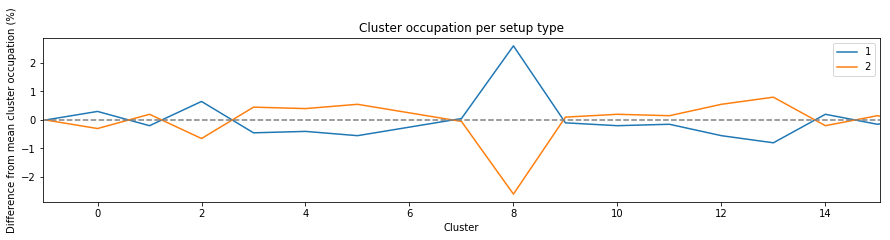

In [0]:
means = np.repeat(np.mean(dens,axis=1),2).reshape(dens.shape)
fig,ax=plt.subplots(1,1,figsize=(15,3))

for idx,setup_type in enumerate([1,2]):
    ax.plot(np.arange(-1,len(dens)-1),100*(dens[:,idx]-means[:,idx]),label=setup_type);#/means[:,idx],label=setup_type);
ax.axhline(0,color='gray',ls='--')
ax.set_xlim([-1.05,15.05])
ax.set_xlabel('Cluster')
ax.set_ylabel('Difference from mean cluster occupation (%)')
ax.set_title('Cluster occupation per setup type')
plt.legend(bbox_to_anchor=(1,1))

In [0]:
df = pickle.load(open('../data/umap-cluster-shuffle.pkl','rb'))
clusters = np.sort(df.index.get_level_values('Cluster').unique())
dens = np.zeros((len(clusters),len(colonies)))

for idx,colony in enumerate(colonies):

    for idy,cluster in enumerate(clusters):

        df_col = df[build_condition_filter(df,[('Colony',colony)])]
        df_pc = df_col[build_condition_filter(df_col,[('Cluster',cluster)])]
        dens[idy,idx] = np.around(len(df_pc)/len(df_col),3)

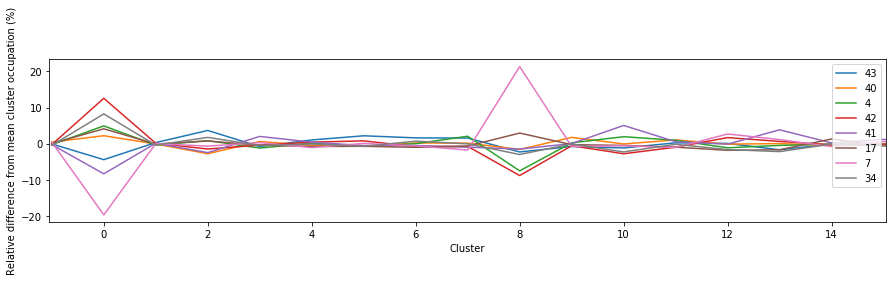

In [0]:
means = np.repeat(np.mean(dens,axis=1),8).reshape(dens.shape)
fig,ax=plt.subplots(1,1,figsize=(15,3))

for idx,colony in enumerate(colonies):
    ax.plot(np.arange(-1,len(dens)-1),100*(dens[:,idx]-means[:,idx]),label=colony);

ax.set_xlim([-1.05,15.05])
ax.set_xlabel('Cluster')
ax.set_ylabel('Relative difference from mean cluster occupation (%)')

plt.legend()#bbox_to_anchor=(1,0.55))

# All ants in different clusters

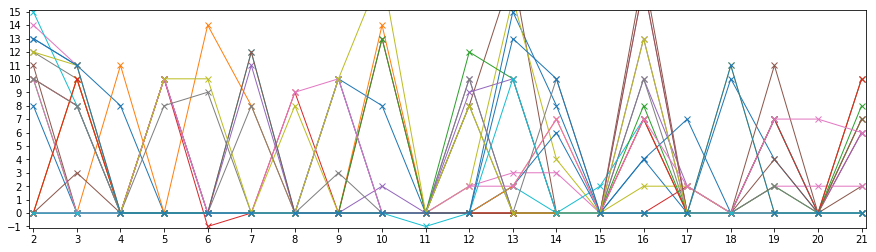

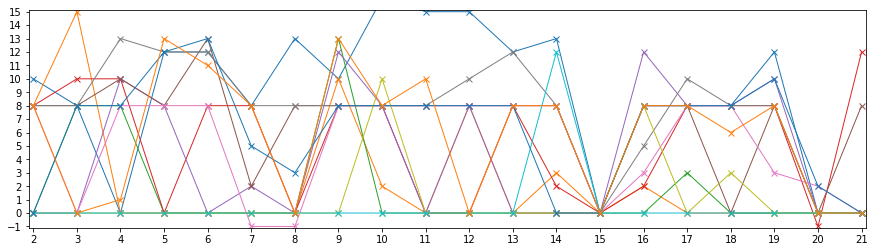

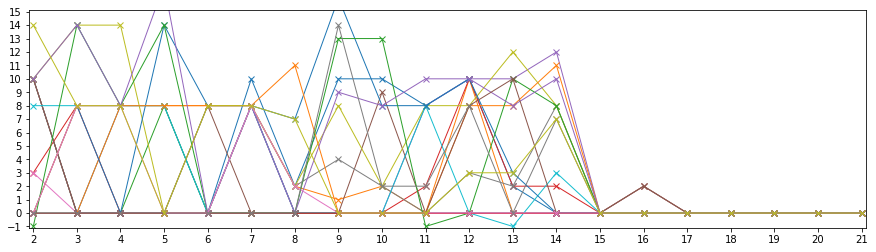

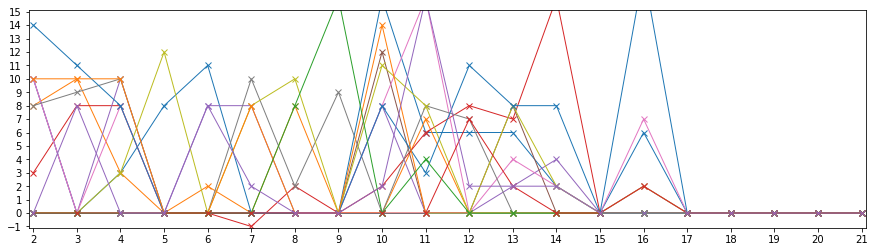

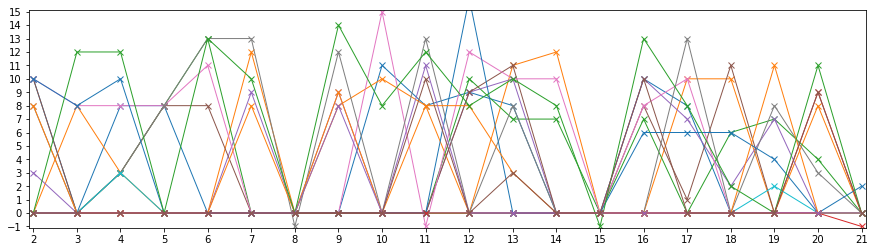

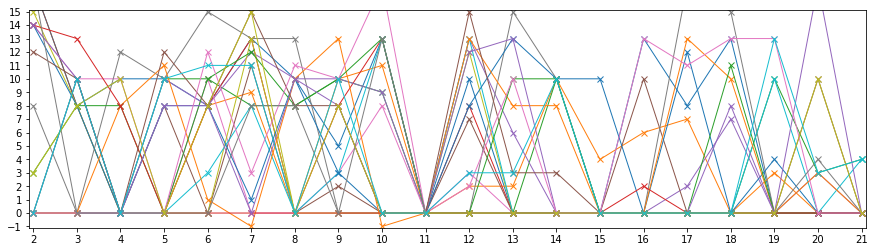

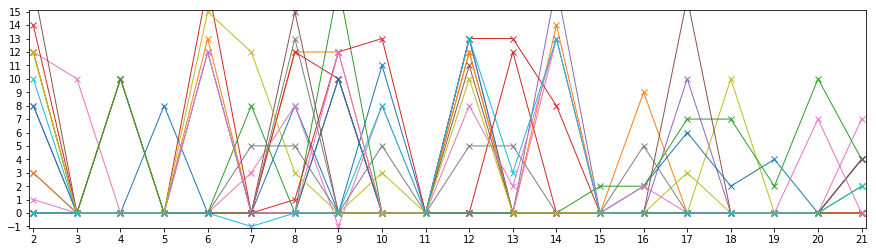

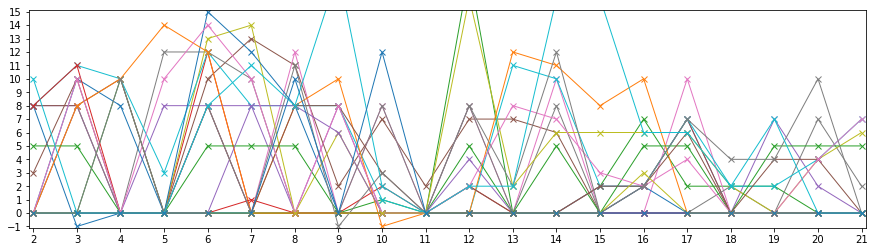

In [0]:
for colony in df.index.levels[0]:
    fig,ax=plt.subplots(figsize=(15,4))
    df_col = df[df.index.get_level_values(0) == colony].sort_index(level='Colony')
    for i in range(int(len(df_col)/20)):
        plt.plot(range(2,22),np.array(df_col.index.get_level_values('Cluster')).reshape(-1,20)[i],lw=1,marker='x')
    plt.xlim([1.9,21.1])
    plt.ylim([-1.1,15.1])
    plt.xticks(range(2,22))
    plt.yticks(range(-1,16))

In [0]:
df_col

0          1  A eclosion   \
Colony Individual Setup type Day Cluster                                     
43     BB         2          2    8      -9.846879  12.813504          0.0   
                             3   -1      -1.882051  11.760169          0.0   
                             4    0      -1.821081   1.978686          0.0   
                             5    0      -2.984497   3.994622          0.0   
                             6    0      -2.784539   0.258534          0.0   
                             7    0      -4.233338   1.804556          0.0   
                             8    0      -2.568849   0.490097          0.0   
                             9    0      -2.113361   1.970409          0.0   
                             10   0      -3.216644   0.491015          0.0   
                             11   0      -2.603374   0.626947          0.0   
                             12   0      -3.379602   0.880794          0.0   
                             13   0      -1.935334   1.590740          0.0   
                             14   0      -3.308921   2.833535          0.0   
                             15   0      -5.246181   2.332549          0.0   
                             16   0      -4.122155   3.195177          0.0   
                             17   0      -3.334597   3.151965          0.0   
                             18   0      -3.628385   2.653924          0.0   
                             19   0      -5.094079   1.129803          0.0   
                             20   0      -2.836385   1.068184          0.0   
                             21   0      -3.084784   4.493873          0.0   
       BYB        2          2    0      -5.187503   1.359159          0.0   
                             3    0      -1.750176   3.374107          0.0   
                             4    0      -3.859599   1.315209          0.0   
                             5    0      -2.235228   0.987733          0.0   
                             6    0      -3.110543   5.424722          0.0   
                             7    0      -3.113881   4.002049          0.0   
                             8    0      -2.205584   3.405980          0.0   
                             9    0      -1.985244   2.086863          0.0   
                             10   0      -4.050557   1.626398          0.0   
                             11   0      -2.470949   0.737632          0.0   
...                                            ...        ...          ...   
       YXX        2          12   2       2.020136  13.721421          0.0   
                             13   2       1.952002  13.394832          0.0   
                             14   16      2.433889  14.422124          0.0   
                             15   16      2.464931  14.391918          0.0   
                             16   6       3.442023  14.403438          0.0   
                             17   6       3.447629  14.459000          0.0   
                             18   2       1.798154  13.880507          0.0   
                             19   7       4.621382  13.838752          0.0   
                             20   0      -2.416320   0.236581          0.0   
                             21   0      -1.895165   1.769474          0.0   
       YY         2          2    0      -3.132415   3.916617          0.0   
                             3    0      -2.739641   1.264265          0.0   
                             4    0      -2.281654   1.400003          0.0   
                             5    0      -2.644917   3.631754          0.0   
                             6    0      -4.047709   1.256389          0.0   
                             7    0      -3.530079   0.872019          0.0   
                             8    10      3.221271  19.986313          0.0   
                             9    0      -2.597370   2.763846          0.0   
                             10   12     -0.877128  15.382131          

# Number of ants in a cluster over time

In [0]:
idx_pic = pd.MultiIndex(levels = [[],[],[]],
                       labels = [[],[],[]],
                        names = ['Colony','Day','Cluster'])

/Users/thomasr/ENV/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
idx_pic = pd.MultiIndex.from_product((df.index.levels[0],range(2,22),range(-1,16)),names = ['Colony','Day','Cluster'])
df_pic = pd.DataFrame(np.zeros(idx_pic.shape),index = idx_pic)

In [0]:
for col in df.index.levels[0]:
    df_col = df[df.index.get_level_values(0) == col].sort_index(level='Colony')
    df_pic.update(df_col.groupby(level=[0,3,4]).size())

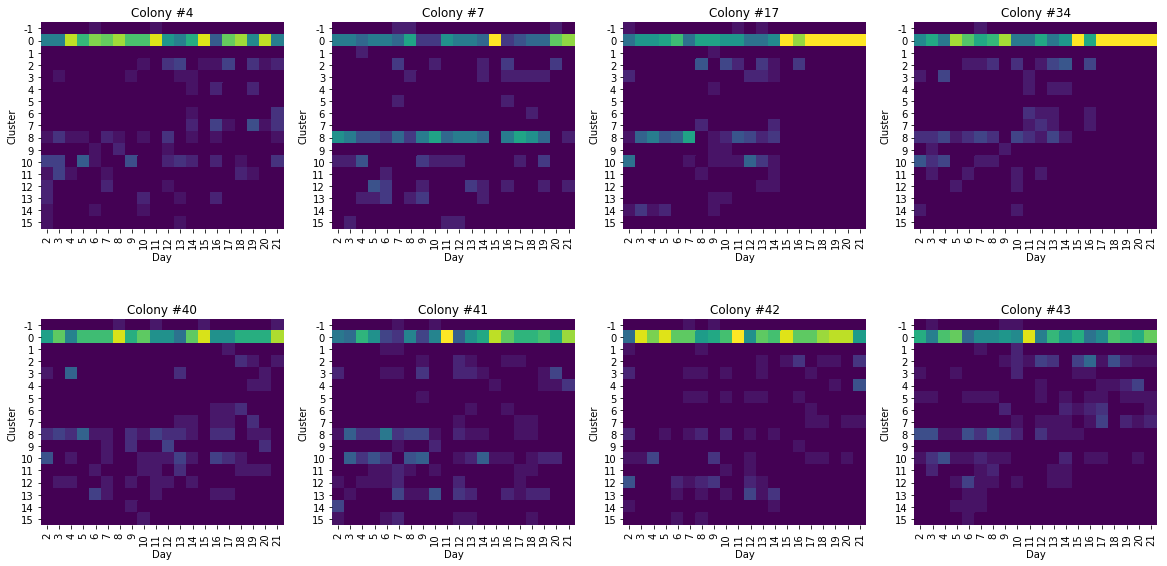

In [0]:
fig,axes=plt.subplots(2,4,figsize=(20,10))
for ax,col in zip(axes.flatten(),df.index.levels[0]):
    col_max = df_pic.loc[col,:].unstack('Cluster').T.sum().max()
    sns.heatmap(df_pic.loc[col,:].unstack('Cluster')[0].T/col_max, ax=ax,square=True,vmin=0,vmax=1,cmap='viridis',cbar=False)
    ax.set_title('Colony #%d'%col)



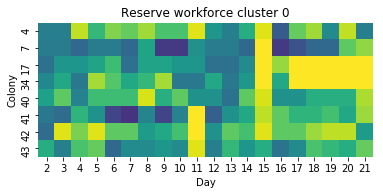

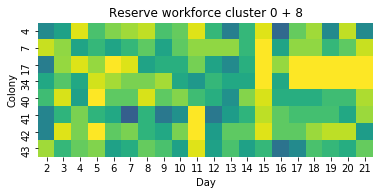

In [0]:
fig,ax=plt.subplots()
col_max = df_pic.unstack('Colony').unstack('Day').sum(axis=0).unstack('Colony').max()
x = np.sum(df_pic.unstack('Cluster')[0][[0]],axis=1).unstack('Colony')/col_max
sns.heatmap(x.T, ax=ax,square=True,vmin=0,vmax=1,cmap='viridis',cbar=False)
ax.set_title('Reserve workforce cluster 0')

fig,ax=plt.subplots()
col_max = df_pic.unstack('Colony').unstack('Day').sum(axis=0).unstack('Colony').max()
y = np.sum(df_pic.unstack('Cluster')[0][[0,8]],axis=1).unstack('Colony')/col_max
sns.heatmap(y.T, ax=ax,square=True,vmin=0,vmax=1,cmap='viridis',cbar=False)
ax.set_title('Reserve workforce cluster 0 + 8');


In [0]:
for xm,ym in zip(x.T.mean(),y.T.mean()):
    print('%.2f, %.2f'%(xm,ym))

0.45, 0.61
0.56, 0.77
0.60, 0.75
0.68, 0.83
0.58, 0.74
0.52, 0.72
0.64, 0.75
0.53, 0.66
0.52, 0.68
0.73, 0.84
0.45, 0.61
0.49, 0.61
0.57, 0.67
0.92, 0.93
0.53, 0.61
0.67, 0.77
0.75, 0.82
0.71, 0.76
0.80, 0.81
0.79, 0.80


In [0]:
for xm,ym in zip(x.T.std(),y.T.std()):
    print('%.2f, %.2f'%(xm,ym))

0.09, 0.19
0.20, 0.14
0.20, 0.16
0.18, 0.14
0.23, 0.15
0.22, 0.20
0.17, 0.13
0.24, 0.14
0.20, 0.12
0.27, 0.17
0.10, 0.12
0.14, 0.15
0.13, 0.08
0.13, 0.11
0.24, 0.18
0.26, 0.18
0.22, 0.14
0.24, 0.19
0.17, 0.16
0.20, 0.20


# Fraction of time spent in clusters for all ants

In [0]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color'][:7]
markers = ['|','.','v']
cycler = itertools.cycle(itertools.product(colors,markers))

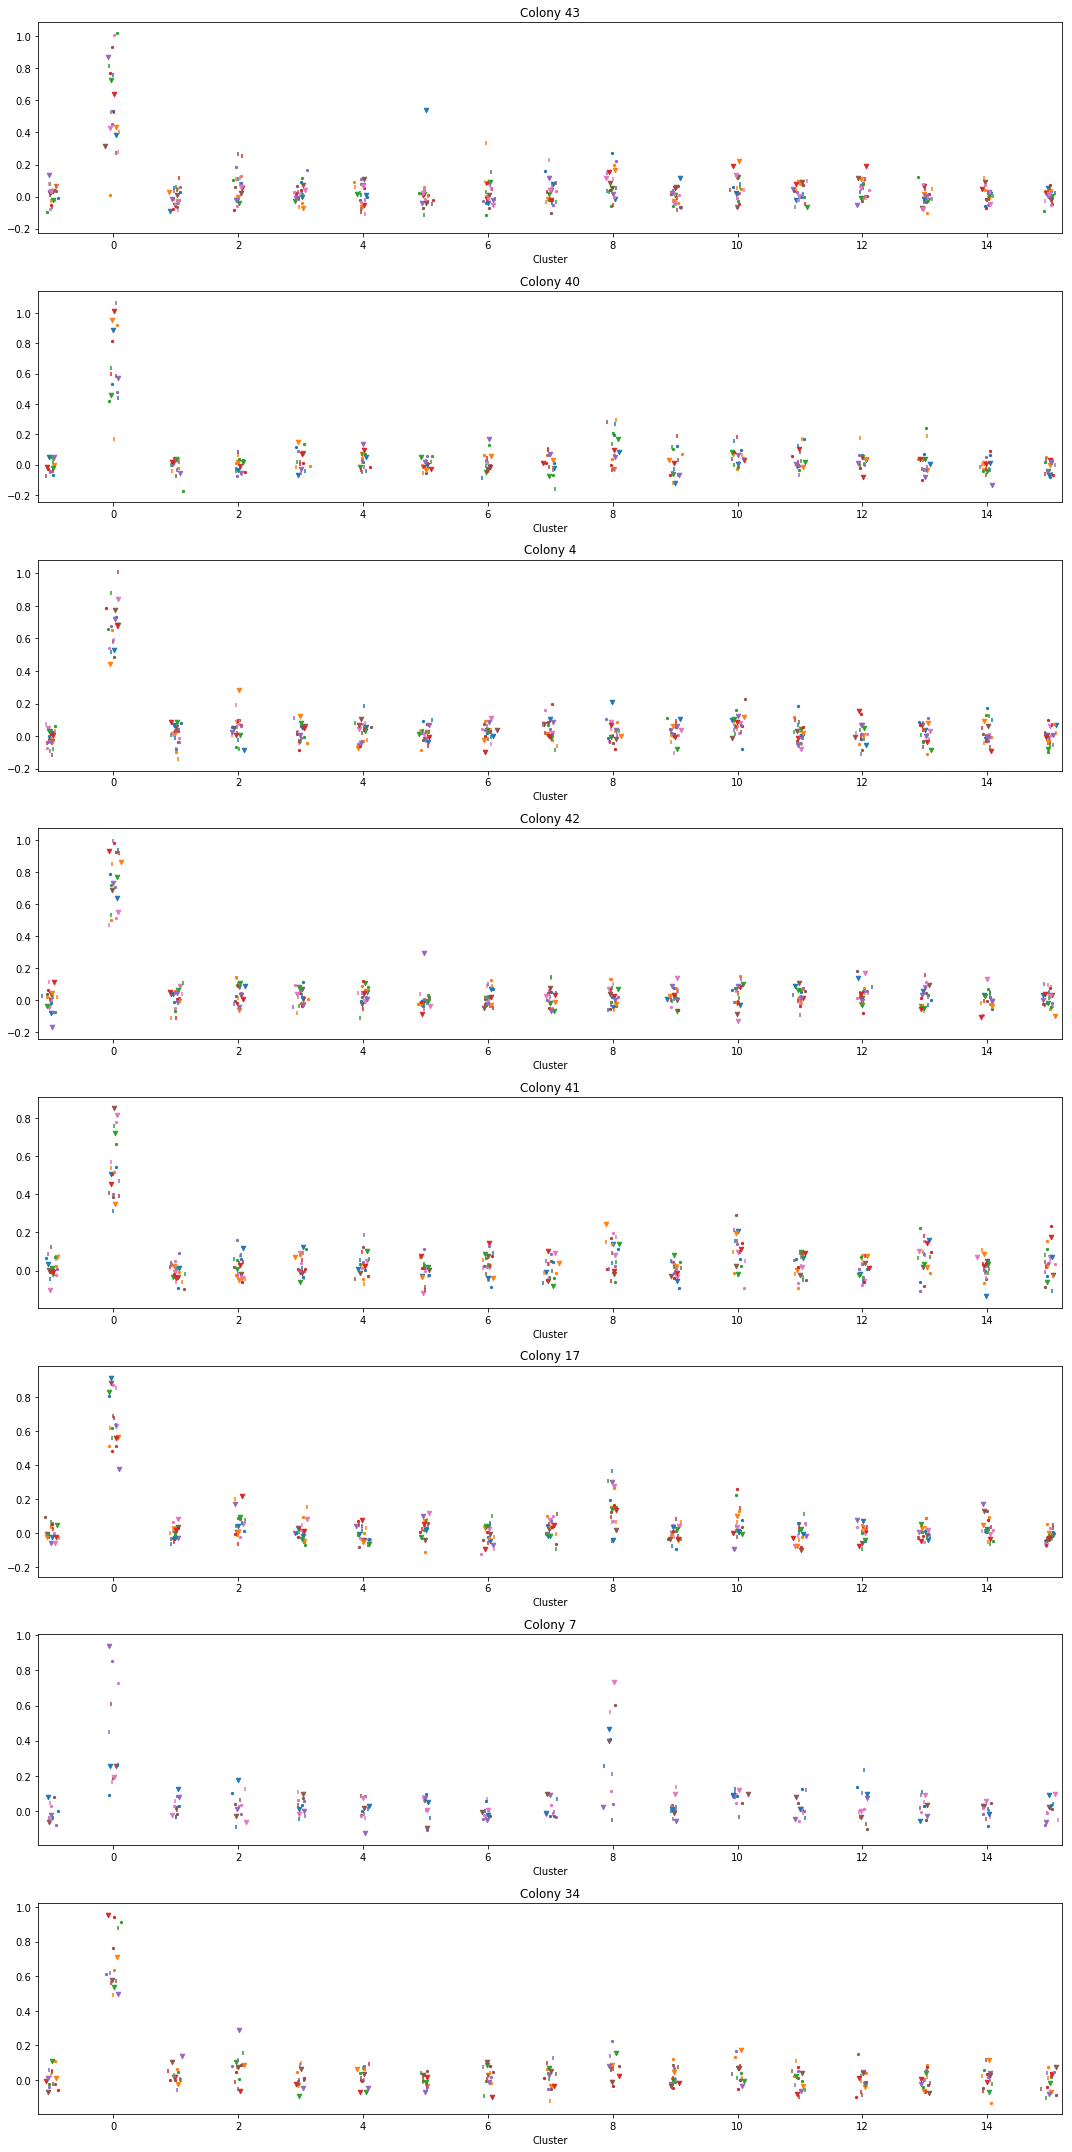

In [0]:
fig,axes=plt.subplots(len(colonies),1,figsize=(15,30))
for ax,colony in zip(axes,colonies):
    
    df_col = df[build_condition_filter(df,[('Colony',colony)])]
    individuals = df_col.stack().unstack('Individual')
    
    dens = np.zeros((len(clusters),len(individuals)))
    
    for idx,individual in enumerate(individuals):
        
        df_col_ind = df_col[build_condition_filter(df_col,[('Individual',individual)])]
        
        for idy,cluster in enumerate(clusters):

            df_pc = df_col_ind[build_condition_filter(df_col_ind,[('Cluster',cluster)])]
            dens[idy,idx] = len(df_pc)/20
    
    means = np.repeat(np.mean(dens,axis=1),len(individuals)).reshape(dens.shape)

    for idx,individual in enumerate(individuals):
        color, marker = next(cycler)
        ax.scatter(np.arange(-1,len(dens)-1)+np.random.normal(0,0.05,len(dens)),(dens[:,idx]-means[:,idx])+np.random.normal(0,0.05,len(dens)),
                   marker=marker,color=color,s=20);

    ax.set_xlim([-1.2,15.2])
    ax.set_xlabel('Cluster')
#     ax.set_ylabel('Relative difference from mean cluster occupation (%)')
    ax.set_title('Colony %d'%colony)

plt.tight_layout()
#     ax.legend(bbox_to_anchor=(1,1))

# Individual ants

# Inactivity data

# Draw lines between clusters for the same ants

In [0]:
df = df[df.index.get_level_values('Cluster') != -1]

dfx = df[df[0]<0]
dfx[0] = np.median(dfx[0])
dfx[1] = np.median(dfx[1])
df.loc[(slice(None),slice(None),slice(None),slice(None),0),(0,1)] = dfx.loc[:,(0,1)]

for i in np.arange(1,16):
    print(i)
    dfx = df[df.index.get_level_values('Cluster') == i]
    dfx[0] = np.median(dfx[0])
    dfx[1] = np.median(dfx[1])
    df.loc[(slice(None),slice(None),slice(None),slice(None),i),(0,1)] = dfx.loc[:,(0,1)]
    


/Users/thomasr/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/thomasr/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/thomasr/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/Users/thomasr/tensorflow/lib/python3.6

1
2
3


/Users/thomasr/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/thomasr/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/thomasr/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/

4
5


/Users/thomasr/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/thomasr/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/Users/thomasr/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/

6
7
8


/Users/thomasr/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/thomasr/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/Users/thomasr/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/

9
10
11


/Users/thomasr/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/thomasr/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/Users/thomasr/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/

12
13
14


/Users/thomasr/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/thomasr/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/thomasr/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/

15


/Users/thomasr/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/thomasr/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/Users/thomasr/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/

In [0]:
norm = clr.Normalize(vmin=2, vmax=21, clip=True)
mapper = cm.ScalarMappable(norm=norm)
lines = [":","-.","--"]
linecycler = itertools.cycle(lines)

In [0]:
dfp = df#[df[0]>0.5]
for colony in dfp.index.levels[0]:
    
    fig,ax = plt.subplots(figsize=(5,5))
    
    df_col = dfp[dfp.index.get_level_values('Colony') == colony]
    for individual in df_col.index.get_level_values(1):
        df_ind = df_col[df_col.index.get_level_values('Individual') == individual]
    
    # Plot the data
        ls = next(linecycler)
        times = df_ind.index.get_level_values('Day').astype('float')
        for i,(x1,x2,y1,y2,time) in enumerate(zip(df_ind[0][:-1],df_ind[0][1:],df_ind[1][:-1],df_ind[1][1:],times[1:])):
            
            if (i == 0):
                marker = 'o'
            else:
                marker = 'x'
            ax.plot((x1,x2),(y1,y2), ls=ls,lw = 1/3,marker=marker,markersize=3,markevery=2, c = mapper.to_rgba(time))
        ax.scatter([x2],[y2], marker = 'o', s = 3, c = [times[-1]], vmin=2,vmax=22)
    # Plot the colorbar; could change this to cluster
#     cbar = plt.colorbar(orientation='horizontal')
#     cbar.set_ticks([5,10,15,20])
#     cbar.ax.set_yticklabels([5,10,15,20])
#     cbar.ax.set_title('Time (days)')

#     set_axis_umap(ax,lims,lims_f)


    plt.savefig('../figures/colonies-non-active-median-%d.pdf'%colony)
    plt.show()
    
    

In [0]:
dfp = df#[df[0]>0.5]
for setup_type in [1,2]:
    
    fig,ax = plt.subplots(figsize=(5,5))
    
    df_set = dfp[dfp.index.get_level_values('Setup type') == setup_type]
    for individual in df_set.index.get_level_values(1):
        df_ind = df_set[df_set.index.get_level_values('Individual') == individual]
    
    # Plot the data
        ls = next(linecycler)
        times = df_ind.index.get_level_values('Day').astype('float')
        for i,(x1,x2,y1,y2,time) in enumerate(zip(df_ind[0][:-1],df_ind[0][1:],df_ind[1][:-1],df_ind[1][1:],times[1:])):
            
            if (i == 0):
                marker = 'o'
            else:
                marker = 'x'
            ax.plot((x1,x2),(y1,y2), ls=ls,lw = 1/3,marker=marker,markersize=3,markevery=2, c = mapper.to_rgba(time))
        ax.scatter([x2],[y2], marker = 'o', s = 3, c = [times[-1]], vmin=2,vmax=22)
    # Plot the colorbar; could change this to cluster
#     cbar = plt.colorbar(orientation='horizontal')
#     cbar.set_ticks([5,10,15,20])
#     cbar.ax.set_yticklabels([5,10,15,20])
#     cbar.ax.set_title('Time (days)')

#     set_axis_umap(ax,lims,lims_f)

    plt.savefig('../figures/setup-type-non-active-median-%d.pdf'%setup_type)
    plt.show()
    